# e-Commerce Fashion-Shop

## EDA

| Feature	| Beschreibung                        |
| ---       | ---                                 |
| user_id	| Benutzerkennung                     |
| path	    | Produktkategorie-URL (anonymisiert) |
| timestamp	| Zeitpunkt des Seitenaufbaus         |
| gender	| Geschlechtszugehörigkeit            |

In [1]:
import pandas as pd
import numpy

In [2]:
# read train data
df = pd.read_csv("train.csv")
display(df.head())

# creating copy for cleaning function
df_copy = df.copy()

,user_id,path,timestamp,gender
0,c8f04f6b-d9b6-4f4a-ad36-f56c76e79722,b3a1716e-4b53-47f9-80fd-d8eb06b10a9b,2017-01-01T00:02:09,m
1,2963e74b-aa59-40dd-a84d-c6b5330eb303,95035d58-1878-42e3-ad44-8d4a47166cbb,2017-01-01T00:03:49,f
2,2963e74b-aa59-40dd-a84d-c6b5330eb303,89e040d0-cb75-4470-95ec-7e935875dd63,2017-01-01T00:03:52,f
3,2963e74b-aa59-40dd-a84d-c6b5330eb303,f713c708-8df1-4d26-94de-7a7ad9532c1f,2017-01-01T00:03:54,f
4,2963e74b-aa59-40dd-a84d-c6b5330eb303,426fcbdf-6361-4182-8e6f-8c737da4f342,2017-01-01T00:04:10,f


In [3]:
#check dtypes
df.dtypes

user_id      object
path         object
timestamp    object
gender       object
dtype: object

In [4]:
# gather general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2403279 entries, 0 to 2403278
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   user_id    object
 1   path       object
 2   timestamp  object
 3   gender     object
dtypes: object(4)
memory usage: 73.3+ MB


In [5]:
# rows and columns
df.shape

(2403279, 4)

In [6]:
# convert "PurchDate" to time series
df.loc[:, "timestamp"] = pd.to_datetime(df.loc[:, "timestamp"])

C:\Users\dk\AppData\Local\Temp\ipykernel_1176\3878604619.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "timestamp"] = pd.to_datetime(df.loc[:, "timestamp"])


In [7]:
#convert object dtypes to categorial to save memory
for col in df.select_dtypes('object'):
    df.loc[:, col] = df.loc[:, col].astype('category')

C:\Users\dk\AppData\Local\Temp\ipykernel_1176\2456265645.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, col] = df.loc[:, col].astype('category')
C:\Users\dk\AppData\Local\Temp\ipykernel_1176\2456265645.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, col] = df.loc[:, col].astype('category')
C:\Users\dk\AppData\Local\Temp\ipykernel_1176\2456265645.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old 

In [8]:
# check number of unique paths
df['path'].nunique()

26394

In [9]:
# check number of unique users
df['user_id'].nunique()

13513

In [10]:
# get date range
max_date = df['timestamp'].tail(1).item()
min_date = df['timestamp'].head(1).item()
print(min_date, max_date)

2017-01-01 00:02:09 2017-05-10 16:39:52


In [11]:
# difference between datetime in timedelta
delta = max_date - min_date
print(f'Difference is {delta.days} days')

Difference is 129 days


In [12]:
# check for duplicates
df.duplicated().sum()

0

In [13]:
# check for missing values (sorted in descending order)
df.isna().sum().sort_values(ascending=False)

user_id      0
path         0
timestamp    0
gender       0
dtype: int64

## Train-Test-Split

In [14]:
# split in training and evaluation data separated on user_id
from sklearn.model_selection import GroupShuffleSplit 

splitter = GroupShuffleSplit(test_size=.20, n_splits=2, random_state=42)
split = splitter.split(df, groups=df['user_id'])
train_inds, test_inds = next(split)

df_train = df.iloc[train_inds]
df_test = df.iloc[test_inds]

df_train_copy = df_train.copy()

In [15]:
df_train

,user_id,path,timestamp,gender
0,c8f04f6b-d9b6-4f4a-ad36-f56c76e79722,b3a1716e-4b53-47f9-80fd-d8eb06b10a9b,2017-01-01 00:02:09,m
1,2963e74b-aa59-40dd-a84d-c6b5330eb303,95035d58-1878-42e3-ad44-8d4a47166cbb,2017-01-01 00:03:49,f
2,2963e74b-aa59-40dd-a84d-c6b5330eb303,89e040d0-cb75-4470-95ec-7e935875dd63,2017-01-01 00:03:52,f
3,2963e74b-aa59-40dd-a84d-c6b5330eb303,f713c708-8df1-4d26-94de-7a7ad9532c1f,2017-01-01 00:03:54,f
4,2963e74b-aa59-40dd-a84d-c6b5330eb303,426fcbdf-6361-4182-8e6f-8c737da4f342,2017-01-01 00:04:10,f
...,...,...,...,...
2403274,8eaa4366-9ff7-45f0-8cd1-d6292a17f397,0cd835c2-a576-4cd3-9cec-db6ee9b1d142,2017-05-10 14:36:45,f
2403275,8eaa4366-9ff7-45f0-8cd1-d6292a17f397,6364528d-347d-42f7-82df-3c2a78c2ffcb,2017-05-10 16:38:36,f
2403276,8eaa4366-9ff7-45f0-8cd1-d6292a17f397,a6bb16ea-ec02-49d2-81b0-3ad120175c7d,2017-05-10 16:38:39,f
2403277,8eaa4366-9ff7-45f0-8cd1-d6292a17f397,aefa185d-f9d8-458f-b6d0-310ef1b8a0a8,2017-05-10 16:39:26,f


In [16]:
df_test

,user_id,path,timestamp,gender
38,a09a43ed-e001-4bf9-a80b-51a7d867407e,4ec650b0-f470-47e3-b911-1d99f204126d,2017-01-01 00:08:21,f
46,a09a43ed-e001-4bf9-a80b-51a7d867407e,a0a5840c-c77f-496c-bdee-0a6868fd0c5d,2017-01-01 00:08:38,f
50,a09a43ed-e001-4bf9-a80b-51a7d867407e,2bf8d768-c0ba-431f-9afd-4b9bc42988c4,2017-01-01 00:08:47,f
51,a09a43ed-e001-4bf9-a80b-51a7d867407e,5f380a3f-34b4-4164-be8c-9c2e4ee3fa3e,2017-01-01 00:08:49,f
53,a09a43ed-e001-4bf9-a80b-51a7d867407e,84c61326-47cd-40f3-8e66-22d94e893cf0,2017-01-01 00:08:51,f
...,...,...,...,...
2403010,fcc7a8c2-5ab2-4e82-aea7-0ece7b75df69,75e10259-b26e-4056-852f-bc7c996a4a29,2017-05-01 01:17:59,f
2403011,fcc7a8c2-5ab2-4e82-aea7-0ece7b75df69,6fea00d2-9f0e-41b4-9b7f-5bd54c7c8f86,2017-05-01 01:18:16,f
2403012,fcc7a8c2-5ab2-4e82-aea7-0ece7b75df69,f7b3eb02-1aa6-4cac-9ff7-e6b52130f44f,2017-05-01 02:39:13,f
2403013,fcc7a8c2-5ab2-4e82-aea7-0ece7b75df69,2bb2dbf4-9fed-4b2a-8799-008dcdac98df,2017-05-01 02:39:32,f


## Preparation

In [17]:
# set user_id as index
df_train = df_train.set_index('user_id')

In [18]:
# individual visits per user
df_train['url_count'] = df_train.groupby('user_id')['path'].count()
df_train['url_count']

user_id
c8f04f6b-d9b6-4f4a-ad36-f56c76e79722     153
2963e74b-aa59-40dd-a84d-c6b5330eb303      47
2963e74b-aa59-40dd-a84d-c6b5330eb303      47
2963e74b-aa59-40dd-a84d-c6b5330eb303      47
2963e74b-aa59-40dd-a84d-c6b5330eb303      47
                                        ... 
8eaa4366-9ff7-45f0-8cd1-d6292a17f397    3969
8eaa4366-9ff7-45f0-8cd1-d6292a17f397    3969
8eaa4366-9ff7-45f0-8cd1-d6292a17f397    3969
8eaa4366-9ff7-45f0-8cd1-d6292a17f397    3969
8eaa4366-9ff7-45f0-8cd1-d6292a17f397    3969
Name: url_count, Length: 1929998, dtype: int64

<Axes: >

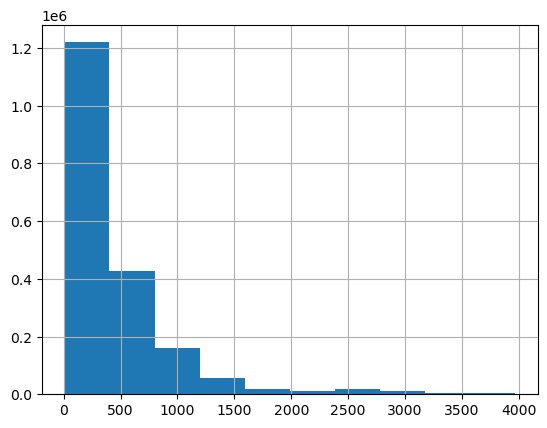

In [19]:
# url_count as histogram
df_train['url_count'].hist()

<Axes: >

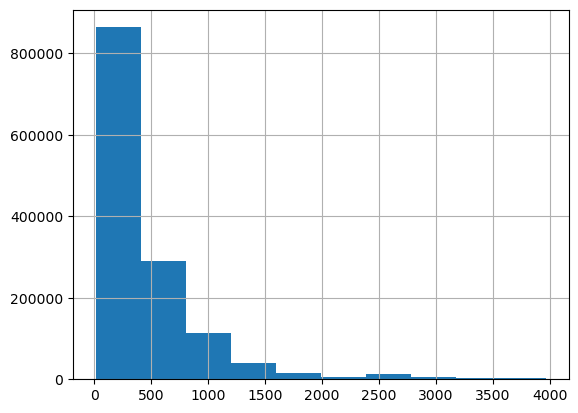

In [20]:
# female
df_train.loc[df_train['gender'] == 'f', 'url_count'].hist()

<Axes: >

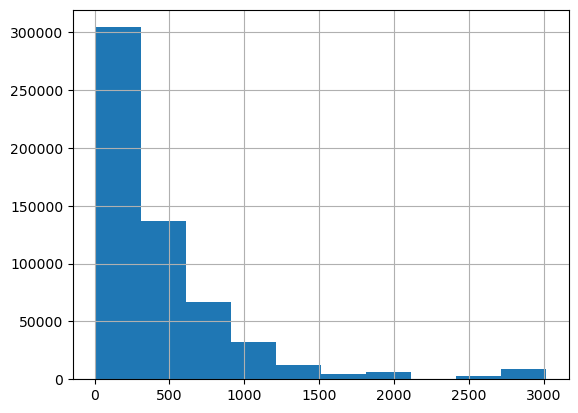

In [21]:
# male
df_train.loc[df_train['gender'] == 'm', 'url_count'].hist()

<Axes: >

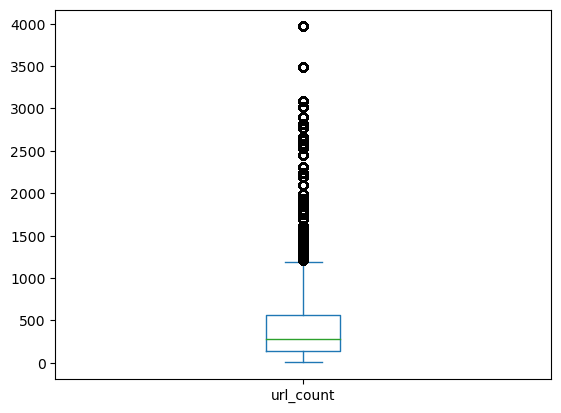

In [22]:
# url_count as boxplot
df_train['url_count'].plot.box()

In [23]:
# typical hour of day
df_train['typical_hour_of_day'] = df_train.groupby('user_id')['timestamp'].apply(lambda x: x.dt.hour.value_counts().idxmax())
df_train['typical_hour_of_day']

user_id
c8f04f6b-d9b6-4f4a-ad36-f56c76e79722    16
2963e74b-aa59-40dd-a84d-c6b5330eb303     0
2963e74b-aa59-40dd-a84d-c6b5330eb303     0
2963e74b-aa59-40dd-a84d-c6b5330eb303     0
2963e74b-aa59-40dd-a84d-c6b5330eb303     0
                                        ..
8eaa4366-9ff7-45f0-8cd1-d6292a17f397    15
8eaa4366-9ff7-45f0-8cd1-d6292a17f397    15
8eaa4366-9ff7-45f0-8cd1-d6292a17f397    15
8eaa4366-9ff7-45f0-8cd1-d6292a17f397    15
8eaa4366-9ff7-45f0-8cd1-d6292a17f397    15
Name: typical_hour_of_day, Length: 1929998, dtype: int64

In [24]:
# typical weekday
df_train['typical_weekday'] = df_train.groupby('user_id')['timestamp'].apply(lambda x: x.dt.weekday.value_counts().idxmax())
df_train['typical_weekday']

user_id
c8f04f6b-d9b6-4f4a-ad36-f56c76e79722    1
2963e74b-aa59-40dd-a84d-c6b5330eb303    0
2963e74b-aa59-40dd-a84d-c6b5330eb303    0
2963e74b-aa59-40dd-a84d-c6b5330eb303    0
2963e74b-aa59-40dd-a84d-c6b5330eb303    0
                                       ..
8eaa4366-9ff7-45f0-8cd1-d6292a17f397    6
8eaa4366-9ff7-45f0-8cd1-d6292a17f397    6
8eaa4366-9ff7-45f0-8cd1-d6292a17f397    6
8eaa4366-9ff7-45f0-8cd1-d6292a17f397    6
8eaa4366-9ff7-45f0-8cd1-d6292a17f397    6
Name: typical_weekday, Length: 1929998, dtype: int64

In [25]:
df_train['visited_paths'] = df_train.groupby('user_id')['path'].agg(lambda x: list(set(x)))
df_train['visited_paths']

user_id
c8f04f6b-d9b6-4f4a-ad36-f56c76e79722    [be4e955d-c92c-4502-9b9d-acb8b0674374, 52fd93f...
2963e74b-aa59-40dd-a84d-c6b5330eb303    [af5656ef-2d6f-4e19-80af-39fe7c8aaaba, e4b9748...
2963e74b-aa59-40dd-a84d-c6b5330eb303    [af5656ef-2d6f-4e19-80af-39fe7c8aaaba, e4b9748...
2963e74b-aa59-40dd-a84d-c6b5330eb303    [af5656ef-2d6f-4e19-80af-39fe7c8aaaba, e4b9748...
2963e74b-aa59-40dd-a84d-c6b5330eb303    [af5656ef-2d6f-4e19-80af-39fe7c8aaaba, e4b9748...
                                                              ...                        
8eaa4366-9ff7-45f0-8cd1-d6292a17f397    [6aa52276-4986-46f5-8cda-9a515a939902, 40cfe0d...
8eaa4366-9ff7-45f0-8cd1-d6292a17f397    [6aa52276-4986-46f5-8cda-9a515a939902, 40cfe0d...
8eaa4366-9ff7-45f0-8cd1-d6292a17f397    [6aa52276-4986-46f5-8cda-9a515a939902, 40cfe0d...
8eaa4366-9ff7-45f0-8cd1-d6292a17f397    [6aa52276-4986-46f5-8cda-9a515a939902, 40cfe0d...
8eaa4366-9ff7-45f0-8cd1-d6292a17f397    [6aa52276-4986-46f5-8cda-9a515a939902, 40cfe0d...
Na

<Axes: >

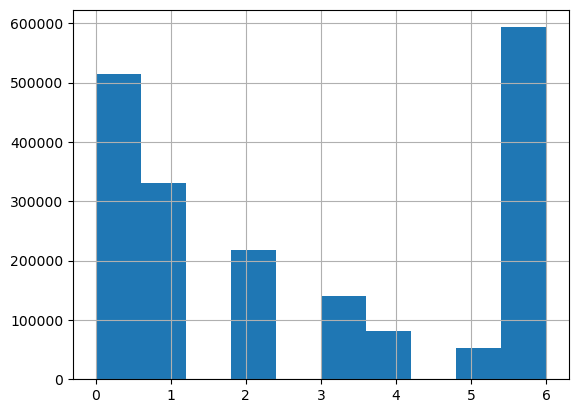

In [26]:
# typical_weekday as histogram
df_train['typical_weekday'].hist()

In [27]:
# check for duplicates
df_train.index.duplicated().sum()

1919188

In [28]:
# check for user_id value counts
df_train.index.value_counts()

8eaa4366-9ff7-45f0-8cd1-d6292a17f397    3969
713fa9ec-bb69-40ad-bab2-dfdc0dc1d770    3489
2a8c738d-d209-4b86-a904-7154a9e27e15    3084
5e7dbc96-50a4-4042-85ca-b2e1fb6be1a0    3018
f30170e9-e4cf-4a94-ac40-934893e932de    2900
                                        ... 
910e3847-3509-4ff6-bc9e-e26bccd15266       0
913ea77d-f3e2-4420-9914-602c648c06f2       0
913fc39f-e84b-436c-b7df-9c77008e16f1       0
9198b22b-fa04-43f3-81d0-b9d77f3dc7ec       0
fffd9768-b646-4a6b-8896-5aac81e8ac2e       0
Name: user_id, Length: 13513, dtype: int64

In [29]:
# check for path value counts
df_train['path'].value_counts()

e117ac60-fecf-4867-8a52-2fe06020bef3    117
13d87662-03b0-48ec-abf5-250f5186ee62    117
4c502f55-0cc3-4cd8-8f9d-5618163fab4f    116
52bd93d7-ae1e-4387-b032-239371a0c364    116
5d753aed-ee5b-478f-80a7-5e2753fc0d76    114
                                       ... 
1249e2cb-e0b0-420e-af84-54fd0f12ee35     36
64bd9a88-5f91-4bca-a469-1a246ce81754     35
c5a85339-e520-49c3-a443-037ef508777e     34
a5ebc836-e9d6-407c-bc25-bce3330f542d     33
458d4c2c-3d68-4569-9ab6-aeb23a71dee0     24
Name: path, Length: 26394, dtype: int64

In [30]:
# count number of genders represented
df_train.loc[:, 'gender'].unique()

['m', 'f']
Categories (2, object): ['f', 'm']

In [31]:
# check gender distribution
df_train['gender'].value_counts()

f    1355971
m     574027
Name: gender, dtype: int64

In [32]:
# check gender distribution (normalized)
pd.crosstab(df_train['gender'], columns='count', normalize=True)

col_0,count
gender,
f,0.702576
m,0.297424


In [33]:
df_train.head(10)

,path,timestamp,gender,url_count,typical_hour_of_day,typical_weekday,visited_paths
user_id,,,,,,,
c8f04f6b-d9b6-4f4a-ad36-f56c76e79722,b3a1716e-4b53-47f9-80fd-d8eb06b10a9b,2017-01-01 00:02:09,m,153,16,1,"[be4e955d-c92c-4502-9b9d-acb8b0674374, 52fd93f..."
2963e74b-aa59-40dd-a84d-c6b5330eb303,95035d58-1878-42e3-ad44-8d4a47166cbb,2017-01-01 00:03:49,f,47,0,0,"[af5656ef-2d6f-4e19-80af-39fe7c8aaaba, e4b9748..."
2963e74b-aa59-40dd-a84d-c6b5330eb303,89e040d0-cb75-4470-95ec-7e935875dd63,2017-01-01 00:03:52,f,47,0,0,"[af5656ef-2d6f-4e19-80af-39fe7c8aaaba, e4b9748..."
2963e74b-aa59-40dd-a84d-c6b5330eb303,f713c708-8df1-4d26-94de-7a7ad9532c1f,2017-01-01 00:03:54,f,47,0,0,"[af5656ef-2d6f-4e19-80af-39fe7c8aaaba, e4b9748..."
2963e74b-aa59-40dd-a84d-c6b5330eb303,426fcbdf-6361-4182-8e6f-8c737da4f342,2017-01-01 00:04:10,f,47,0,0,"[af5656ef-2d6f-4e19-80af-39fe7c8aaaba, e4b9748..."
2963e74b-aa59-40dd-a84d-c6b5330eb303,ae0f17bd-7d3e-4008-8cda-d002c854c029,2017-01-01 00:04:22,f,47,0,0,"[af5656ef-2d6f-4e19-80af-39fe7c8aaaba, e4b9748..."
7f84af98-6319-4b39-aba8-c1bf2f95f902,96fe5a79-9381-413a-bfc5-bd5b1d08c32a,2017-01-01 00:04:26,f,398,8,6,"[a3060fbb-3ec3-44e0-a884-c71f745b1fe6, d383bd6..."
b07ca912-7622-44a5-88b3-aadc2e75654e,379607f0-2cfe-4b07-8c24-75dffbcd0727,2017-01-01 00:04:35,m,682,22,3,"[1902912d-cfe7-4cc5-b32e-bc77681b5386, 95eaee5..."
d9272207-72d5-462b-af77-7701eb4f43b1,847a0272-0ac0-4c5f-a466-f43747b23a6d,2017-01-01 00:04:36,f,63,12,0,"[74d39320-b1d6-4b71-9725-cf253e2e965e, 565828d..."


In [34]:
# remove duplicated user ids
df_train_noduplicates = df_train[~df_train.index.duplicated(keep='first')]

In [35]:
# drop original path and timestamp columns
df_train_cleaned = df_train_noduplicates.drop(['path', 'timestamp'], axis=1)
df_train_cleaned

,gender,url_count,typical_hour_of_day,typical_weekday,visited_paths
user_id,,,,,
c8f04f6b-d9b6-4f4a-ad36-f56c76e79722,m,153,16,1,"[be4e955d-c92c-4502-9b9d-acb8b0674374, 52fd93f..."
2963e74b-aa59-40dd-a84d-c6b5330eb303,f,47,0,0,"[af5656ef-2d6f-4e19-80af-39fe7c8aaaba, e4b9748..."
7f84af98-6319-4b39-aba8-c1bf2f95f902,f,398,8,6,"[a3060fbb-3ec3-44e0-a884-c71f745b1fe6, d383bd6..."
b07ca912-7622-44a5-88b3-aadc2e75654e,m,682,22,3,"[1902912d-cfe7-4cc5-b32e-bc77681b5386, 95eaee5..."
d9272207-72d5-462b-af77-7701eb4f43b1,f,63,12,0,"[74d39320-b1d6-4b71-9725-cf253e2e965e, 565828d..."
...,...,...,...,...,...
25b84945-6db1-4460-8222-fa82d9a79300,f,247,21,0,"[cdf74433-c96e-4abc-b1e5-dd4e50bb099e, 1a82780..."
9b0e2291-4fa5-4c32-882d-071918199566,f,109,19,4,"[2566610f-0ef7-4b0b-9a2d-7f3896c92f7a, 1d7cd52..."
4853d3fa-a7ef-4682-9908-dc7bf7edc21f,f,95,21,2,"[da7cda73-7987-449a-aea0-0459cc7021c8, 1772330..."


## Data Preparation

In [36]:
# preparation function
def preparation(df):
    """
    Prepares the dataframe for modeling and assigns correct data types

    Args:
        df (pd.DataFrame) : Data set.

    Returns:
        df (pd.DataFrame) : Prepared data set.
    """
    
    # convert "PurchDate" to time series
    df.loc[:, "timestamp"] = pd.to_datetime(df.loc[:, "timestamp"])
    
    #convert object dtypes to categorial to save memory
    for col in df.select_dtypes('object'):
        df.loc[:, col] = df.loc[:, col].astype('category')
    
    # set user_id as index
    df = df.set_index('user_id')
    
    # individual visits per user
    df['url_count'] = df.groupby('user_id')['path'].count()
    
    # typical hour
    df['typical_hour_of_day'] = df.groupby('user_id')['timestamp'].apply(lambda x: x.dt.hour.value_counts().idxmax())

    # typical weekday
    df['typical_weekday'] = df.groupby('user_id')['timestamp'].apply(lambda x: x.dt.weekday.value_counts().idxmax())
    
    df['visited_paths'] = df.groupby('user_id')['path'].agg(lambda x: list(set(x)))
    
    # remove duplicated indices
    df_noduplicates = df[~df.index.duplicated(keep='first')]
    df_cleaned = df_noduplicates.drop(['path', 'timestamp'], axis=1)
    
    return df_cleaned

In [37]:
# test preparation function on basic level
df_train_prep = preparation(df_train_copy)
df_train_prep

C:\Users\dk\AppData\Local\Temp\ipykernel_1176\2868418943.py:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "timestamp"] = pd.to_datetime(df.loc[:, "timestamp"])


,gender,url_count,typical_hour_of_day,typical_weekday,visited_paths
user_id,,,,,
c8f04f6b-d9b6-4f4a-ad36-f56c76e79722,m,153,16,1,"[be4e955d-c92c-4502-9b9d-acb8b0674374, 52fd93f..."
2963e74b-aa59-40dd-a84d-c6b5330eb303,f,47,0,0,"[af5656ef-2d6f-4e19-80af-39fe7c8aaaba, e4b9748..."
7f84af98-6319-4b39-aba8-c1bf2f95f902,f,398,8,6,"[a3060fbb-3ec3-44e0-a884-c71f745b1fe6, d383bd6..."
b07ca912-7622-44a5-88b3-aadc2e75654e,m,682,22,3,"[1902912d-cfe7-4cc5-b32e-bc77681b5386, 95eaee5..."
d9272207-72d5-462b-af77-7701eb4f43b1,f,63,12,0,"[74d39320-b1d6-4b71-9725-cf253e2e965e, 565828d..."
...,...,...,...,...,...
25b84945-6db1-4460-8222-fa82d9a79300,f,247,21,0,"[cdf74433-c96e-4abc-b1e5-dd4e50bb099e, 1a82780..."
9b0e2291-4fa5-4c32-882d-071918199566,f,109,19,4,"[2566610f-0ef7-4b0b-9a2d-7f3896c92f7a, 1d7cd52..."
4853d3fa-a7ef-4682-9908-dc7bf7edc21f,f,95,21,2,"[da7cda73-7987-449a-aea0-0459cc7021c8, 1772330..."


In [38]:
# double check for working function
df_train_prep.equals(df_train_cleaned)

True

In [39]:
# prepare evaluation set
df_test_prep = preparation(df_test)
df_test_prep.head()

C:\Users\dk\AppData\Local\Temp\ipykernel_1176\2868418943.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "timestamp"] = pd.to_datetime(df.loc[:, "timestamp"])
C:\Users\dk\AppData\Local\Temp\ipykernel_1176\2868418943.py:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "timestamp"] = pd.to_datetime(df.loc[:, "timestamp"])


,gender,url_count,typical_hour_of_day,typical_weekday,visited_paths
user_id,,,,,
a09a43ed-e001-4bf9-a80b-51a7d867407e,f,148,3,1,"[425bf5a2-11ae-4c71-b59a-68efed7d2ec6, 3f013ea..."
062bcbf9-0274-4a91-89f9-f5f5c0096367,f,50,16,6,"[803c446e-c874-4172-be01-886f560a2f40, 5335ef0..."
f0b678c0-351c-4240-b2e4-9ce34355e1dd,f,40,9,6,"[e416232c-4d7f-4ee3-b580-9d977602e16d, 0456ff3..."
54c91562-9b43-4412-9bb8-750a12a7572e,m,109,5,0,"[8820ddb4-4cc4-46a3-b260-1b7ab3926005, e4e3d9c..."
e1b1133b-64bd-421d-a598-5e4a08dc0dd0,m,102,0,1,"[3dd2fa7f-b6a7-49e4-95e8-6e448dea9f05, 789de16..."


## Modeling

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MultiLabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, f1_score
from sklearn.decomposition import PCA

In [41]:
mlb = MultiLabelBinarizer()

encoded_paths = mlb.fit_transform(df_train_prep['visited_paths'])

In [42]:
encoded_paths

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [43]:
df_train_encoded = pd.DataFrame(encoded_paths, columns=mlb.classes_, index=df_train_prep.index)

In [44]:
df_train_encoded

,00008484-081a-4bb5-99ce-eeed599df25e,00034084-3c84-4827-9154-25a047519fe8,0003694d-eaeb-45da-9835-4e4e0926b715,00037a56-6232-4648-b1ae-3b7423319c74,00043562-2978-4ba3-a9b9-7f9845ff3c2a,0006d913-4954-43c3-84f1-6cf509814765,000be475-f9d5-4365-a040-2b5cc662a5a9,000d3b74-bff6-4a9d-825f-606644792338,000e1843-d563-4651-9510-99236e371472,000f52d6-afb5-40fa-bb80-7ca539be3dbc,...,ffe0090b-79b1-46f3-a9b5-5272ab0183e1,ffe35af4-b9c7-40ee-a9e9-36f7bac4965c,ffe4d87e-10c1-49ae-9ce6-fb371d71ce4e,ffe5ed7c-262e-4420-92b6-9ca0a70bd54b,ffe84164-c6d9-405e-ba1f-a2fda42a495e,ffe96588-63ec-42b4-b522-25ca2df900a4,ffec5d88-955e-4585-9cb7-5a2bd831ad47,fff0dd85-e912-4363-b531-155628113469,fff40ebc-f168-4f4f-a174-d83a4878169d,fffcea2a-c021-4f20-8bcb-08754392b14d
user_id,,,,,,,,,,,,,,,,,,,,,
c8f04f6b-d9b6-4f4a-ad36-f56c76e79722,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2963e74b-aa59-40dd-a84d-c6b5330eb303,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7f84af98-6319-4b39-aba8-c1bf2f95f902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b07ca912-7622-44a5-88b3-aadc2e75654e,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d9272207-72d5-462b-af77-7701eb4f43b1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25b84945-6db1-4460-8222-fa82d9a79300,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9b0e2291-4fa5-4c32-882d-071918199566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4853d3fa-a7ef-4682-9908-dc7bf7edc21f,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df_train_prep = pd.concat([df_train_prep, df_train_encoded], axis=1)

In [46]:
df_train_prep

,gender,url_count,typical_hour_of_day,typical_weekday,visited_paths,00008484-081a-4bb5-99ce-eeed599df25e,00034084-3c84-4827-9154-25a047519fe8,0003694d-eaeb-45da-9835-4e4e0926b715,00037a56-6232-4648-b1ae-3b7423319c74,00043562-2978-4ba3-a9b9-7f9845ff3c2a,...,ffe0090b-79b1-46f3-a9b5-5272ab0183e1,ffe35af4-b9c7-40ee-a9e9-36f7bac4965c,ffe4d87e-10c1-49ae-9ce6-fb371d71ce4e,ffe5ed7c-262e-4420-92b6-9ca0a70bd54b,ffe84164-c6d9-405e-ba1f-a2fda42a495e,ffe96588-63ec-42b4-b522-25ca2df900a4,ffec5d88-955e-4585-9cb7-5a2bd831ad47,fff0dd85-e912-4363-b531-155628113469,fff40ebc-f168-4f4f-a174-d83a4878169d,fffcea2a-c021-4f20-8bcb-08754392b14d
user_id,,,,,,,,,,,,,,,,,,,,,
c8f04f6b-d9b6-4f4a-ad36-f56c76e79722,m,153,16,1,"[be4e955d-c92c-4502-9b9d-acb8b0674374, 52fd93f...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2963e74b-aa59-40dd-a84d-c6b5330eb303,f,47,0,0,"[af5656ef-2d6f-4e19-80af-39fe7c8aaaba, e4b9748...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7f84af98-6319-4b39-aba8-c1bf2f95f902,f,398,8,6,"[a3060fbb-3ec3-44e0-a884-c71f745b1fe6, d383bd6...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b07ca912-7622-44a5-88b3-aadc2e75654e,m,682,22,3,"[1902912d-cfe7-4cc5-b32e-bc77681b5386, 95eaee5...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d9272207-72d5-462b-af77-7701eb4f43b1,f,63,12,0,"[74d39320-b1d6-4b71-9725-cf253e2e965e, 565828d...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25b84945-6db1-4460-8222-fa82d9a79300,f,247,21,0,"[cdf74433-c96e-4abc-b1e5-dd4e50bb099e, 1a82780...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9b0e2291-4fa5-4c32-882d-071918199566,f,109,19,4,"[2566610f-0ef7-4b0b-9a2d-7f3896c92f7a, 1d7cd52...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4853d3fa-a7ef-4682-9908-dc7bf7edc21f,f,95,21,2,"[da7cda73-7987-449a-aea0-0459cc7021c8, 1772330...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df_train_prep.drop('visited_paths', axis=1, inplace=True)

In [48]:
df_train_prep.head()

,gender,url_count,typical_hour_of_day,typical_weekday,00008484-081a-4bb5-99ce-eeed599df25e,00034084-3c84-4827-9154-25a047519fe8,0003694d-eaeb-45da-9835-4e4e0926b715,00037a56-6232-4648-b1ae-3b7423319c74,00043562-2978-4ba3-a9b9-7f9845ff3c2a,0006d913-4954-43c3-84f1-6cf509814765,...,ffe0090b-79b1-46f3-a9b5-5272ab0183e1,ffe35af4-b9c7-40ee-a9e9-36f7bac4965c,ffe4d87e-10c1-49ae-9ce6-fb371d71ce4e,ffe5ed7c-262e-4420-92b6-9ca0a70bd54b,ffe84164-c6d9-405e-ba1f-a2fda42a495e,ffe96588-63ec-42b4-b522-25ca2df900a4,ffec5d88-955e-4585-9cb7-5a2bd831ad47,fff0dd85-e912-4363-b531-155628113469,fff40ebc-f168-4f4f-a174-d83a4878169d,fffcea2a-c021-4f20-8bcb-08754392b14d
user_id,,,,,,,,,,,,,,,,,,,,,
c8f04f6b-d9b6-4f4a-ad36-f56c76e79722,m,153,16,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2963e74b-aa59-40dd-a84d-c6b5330eb303,f,47,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7f84af98-6319-4b39-aba8-c1bf2f95f902,f,398,8,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b07ca912-7622-44a5-88b3-aadc2e75654e,m,682,22,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d9272207-72d5-462b-af77-7701eb4f43b1,f,63,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
encoded_paths = mlb.transform(df_test_prep['visited_paths'])

In [50]:
df_test_encoded = pd.DataFrame(encoded_paths, columns=mlb.classes_, index=df_test_prep.index)

In [51]:
df_test_prep = pd.concat([df_test_prep, df_test_encoded], axis=1)

In [52]:
df_test_prep.drop('visited_paths', axis=1, inplace=True)

In [53]:
df_test_prep

,gender,url_count,typical_hour_of_day,typical_weekday,00008484-081a-4bb5-99ce-eeed599df25e,00034084-3c84-4827-9154-25a047519fe8,0003694d-eaeb-45da-9835-4e4e0926b715,00037a56-6232-4648-b1ae-3b7423319c74,00043562-2978-4ba3-a9b9-7f9845ff3c2a,0006d913-4954-43c3-84f1-6cf509814765,...,ffe0090b-79b1-46f3-a9b5-5272ab0183e1,ffe35af4-b9c7-40ee-a9e9-36f7bac4965c,ffe4d87e-10c1-49ae-9ce6-fb371d71ce4e,ffe5ed7c-262e-4420-92b6-9ca0a70bd54b,ffe84164-c6d9-405e-ba1f-a2fda42a495e,ffe96588-63ec-42b4-b522-25ca2df900a4,ffec5d88-955e-4585-9cb7-5a2bd831ad47,fff0dd85-e912-4363-b531-155628113469,fff40ebc-f168-4f4f-a174-d83a4878169d,fffcea2a-c021-4f20-8bcb-08754392b14d
user_id,,,,,,,,,,,,,,,,,,,,,
a09a43ed-e001-4bf9-a80b-51a7d867407e,f,148,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
062bcbf9-0274-4a91-89f9-f5f5c0096367,f,50,16,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
f0b678c0-351c-4240-b2e4-9ce34355e1dd,f,40,9,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54c91562-9b43-4412-9bb8-750a12a7572e,m,109,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
e1b1133b-64bd-421d-a598-5e4a08dc0dd0,m,102,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7bc45c1c-8adf-457d-915d-39f2a027c9a4,m,113,10,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0ea29eb1-6274-4635-a85c-7ebeeda575fa,f,1171,0,5,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6fcf01f6-c3dc-4824-b4a8-a90473e80b93,m,216,6,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# label encoding
df_train_prep.loc[:, 'gender'] = df_train_prep.loc[:, 'gender'].replace({'f': 0, 'm': 1})
df_test_prep.loc[:, 'gender'] = df_test_prep.loc[:, 'gender'].replace({'f': 0, 'm': 1})

C:\Users\dk\AppData\Local\Temp\ipykernel_1176\4288422714.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_train_prep.loc[:, 'gender'] = df_train_prep.loc[:, 'gender'].replace({'f': 0, 'm': 1})
C:\Users\dk\AppData\Local\Temp\ipykernel_1176\4288422714.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_test_prep.loc[:, 'gender'] = df_test_prep.loc[:, 'gender'].replace({'f': 0, 'm': 1})


In [55]:
# instantiate feature matrix and target vector for train set
features_train = df_train_prep.drop("gender", axis=1)
target_train = df_train_prep.loc[:, "gender"]

In [56]:
features_train.head()

,url_count,typical_hour_of_day,typical_weekday,00008484-081a-4bb5-99ce-eeed599df25e,00034084-3c84-4827-9154-25a047519fe8,0003694d-eaeb-45da-9835-4e4e0926b715,00037a56-6232-4648-b1ae-3b7423319c74,00043562-2978-4ba3-a9b9-7f9845ff3c2a,0006d913-4954-43c3-84f1-6cf509814765,000be475-f9d5-4365-a040-2b5cc662a5a9,...,ffe0090b-79b1-46f3-a9b5-5272ab0183e1,ffe35af4-b9c7-40ee-a9e9-36f7bac4965c,ffe4d87e-10c1-49ae-9ce6-fb371d71ce4e,ffe5ed7c-262e-4420-92b6-9ca0a70bd54b,ffe84164-c6d9-405e-ba1f-a2fda42a495e,ffe96588-63ec-42b4-b522-25ca2df900a4,ffec5d88-955e-4585-9cb7-5a2bd831ad47,fff0dd85-e912-4363-b531-155628113469,fff40ebc-f168-4f4f-a174-d83a4878169d,fffcea2a-c021-4f20-8bcb-08754392b14d
user_id,,,,,,,,,,,,,,,,,,,,,
c8f04f6b-d9b6-4f4a-ad36-f56c76e79722,153,16,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2963e74b-aa59-40dd-a84d-c6b5330eb303,47,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7f84af98-6319-4b39-aba8-c1bf2f95f902,398,8,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b07ca912-7622-44a5-88b3-aadc2e75654e,682,22,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d9272207-72d5-462b-af77-7701eb4f43b1,63,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
# instantiate feature matrix and target vector for evaluation set
features_test = df_test_prep.drop("gender", axis=1)
target_test = df_test_prep.loc[:, "gender"]

In [58]:
# baseline model: randomly predicting the same number of cases in each class
from sklearn.dummy import DummyClassifier

model_dummy = DummyClassifier(strategy='uniform', random_state=42)

cross_val_score(estimator=model_dummy,
                X=features_train, 
                y=target_train, 
                cv=5, 
                scoring='f1').mean()

0.3698818384655847

In [59]:
model_dummy.fit(features_train, target_train)

target_test_pred = model_dummy.predict(features_test)
print(f1_score(target_test, target_test_pred))
print(classification_report(target_test, target_test_pred))

0.3850467289719626
              precision    recall  f1-score   support

           0       0.71      0.51      0.60      1899
           1       0.31      0.51      0.39       804

    accuracy                           0.51      2703
   macro avg       0.51      0.51      0.49      2703
weighted avg       0.59      0.51      0.53      2703



In [60]:
features_train

,url_count,typical_hour_of_day,typical_weekday,00008484-081a-4bb5-99ce-eeed599df25e,00034084-3c84-4827-9154-25a047519fe8,0003694d-eaeb-45da-9835-4e4e0926b715,00037a56-6232-4648-b1ae-3b7423319c74,00043562-2978-4ba3-a9b9-7f9845ff3c2a,0006d913-4954-43c3-84f1-6cf509814765,000be475-f9d5-4365-a040-2b5cc662a5a9,...,ffe0090b-79b1-46f3-a9b5-5272ab0183e1,ffe35af4-b9c7-40ee-a9e9-36f7bac4965c,ffe4d87e-10c1-49ae-9ce6-fb371d71ce4e,ffe5ed7c-262e-4420-92b6-9ca0a70bd54b,ffe84164-c6d9-405e-ba1f-a2fda42a495e,ffe96588-63ec-42b4-b522-25ca2df900a4,ffec5d88-955e-4585-9cb7-5a2bd831ad47,fff0dd85-e912-4363-b531-155628113469,fff40ebc-f168-4f4f-a174-d83a4878169d,fffcea2a-c021-4f20-8bcb-08754392b14d
user_id,,,,,,,,,,,,,,,,,,,,,
c8f04f6b-d9b6-4f4a-ad36-f56c76e79722,153,16,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2963e74b-aa59-40dd-a84d-c6b5330eb303,47,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7f84af98-6319-4b39-aba8-c1bf2f95f902,398,8,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b07ca912-7622-44a5-88b3-aadc2e75654e,682,22,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d9272207-72d5-462b-af77-7701eb4f43b1,63,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25b84945-6db1-4460-8222-fa82d9a79300,247,21,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9b0e2291-4fa5-4c32-882d-071918199566,109,19,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4853d3fa-a7ef-4682-9908-dc7bf7edc21f,95,21,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
# one-hot encoding categorial columns
ohe_cols = ['typical_weekday', 'typical_hour_of_day']
paths_mlb = features_train.iloc[:, 3:].columns
pca_col_transformer = ColumnTransformer(transformers=[("OHE", OneHotEncoder(handle_unknown="ignore"), ohe_cols),                                                      
                                                      ("PCA_paths", PCA(n_components=1, random_state=42), paths_mlb)],
                                        remainder="passthrough",
                                        sparse_threshold=0)

In [62]:
# standardizer
scaler = StandardScaler()

In [63]:
# logistic regression
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(class_weight="balanced",
                              random_state=42)

model_pipe_lr = Pipeline([("col_encoder", pca_col_transformer),
                          ("scaler", scaler),
                          ("model", model_lr)])

search_grid_lr = {"model__C": [0.005, 0.01, 0.05, 1]}

grid_model_lr = GridSearchCV(estimator=model_pipe_lr,
                             param_grid=search_grid_lr,
                             cv=5,
                             scoring="f1")

grid_model_lr.fit(features_train, target_train)

print(grid_model_lr.best_estimator_)
print(grid_model_lr.best_score_)

Pipeline(steps=[('col_encoder',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('OHE',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['typical_weekday',
                                                   'typical_hour_of_day']),
                                                 ('PCA_paths',
                                                  PCA(n_components=1,
                                                      random_state=42),
                                                  Index(['00008484-081a-4bb5-99ce-eeed599df25e',
       '00034084-3c84-4827-9154-25a047519fe8',
       '0003694d-eaeb-45da-9...
       'ffe84164-c6d9-405e-ba1f-a2fda42a495e',
       'ffe96588-63ec-42b4-b522-25ca2df900a4',
       'ffec5d88-955e-4585-9cb7-5a2bd831ad47',
       'fff0dd85-e912-4363-b531-155628113469',
       'fff40ebc-f168-4f4f

In [64]:
target_test_pred = grid_model_lr.predict(features_test)

print(f1_score(target_test, target_test_pred))
print(classification_report(target_test, target_test_pred))

0.995049504950495
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1899
           1       0.99      1.00      1.00       804

    accuracy                           1.00      2703
   macro avg       1.00      1.00      1.00      2703
weighted avg       1.00      1.00      1.00      2703



In [65]:
# svm
from sklearn.svm import SVC

model_svc = SVC(class_weight="balanced",
                random_state=42)

model_pipe_svc = Pipeline([("col_encoder", pca_col_transformer),
                           ("scaler", scaler),
                           ("model", model_svc)])

search_grid_svc = {"model__C": [0.001, 0.01, 0.05, 1, 5, 10]}

grid_model_svc = GridSearchCV(estimator=model_pipe_svc,
                             param_grid=search_grid_svc,
                             cv=5,
                             scoring="f1")

grid_model_svc.fit(features_train, target_train)

print(grid_model_svc.best_estimator_)
print(grid_model_svc.best_score_)

Pipeline(steps=[('col_encoder',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('OHE',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['typical_weekday',
                                                   'typical_hour_of_day']),
                                                 ('PCA_paths',
                                                  PCA(n_components=1,
                                                      random_state=42),
                                                  Index(['00008484-081a-4bb5-99ce-eeed599df25e',
       '00034084-3c84-4827-9154-25a047519fe8',
       '0003694d-eaeb-45da-9...
       'ffe84164-c6d9-405e-ba1f-a2fda42a495e',
       'ffe96588-63ec-42b4-b522-25ca2df900a4',
       'ffec5d88-955e-4585-9cb7-5a2bd831ad47',
       'fff0dd85-e912-4363-b531-155628113469',
       'fff40ebc-f168-4f4f

In [66]:
target_test_pred = grid_model_svc.predict(features_test)

print(f1_score(target_test, target_test_pred))
print(classification_report(target_test, target_test_pred))

0.9605263157894737
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1899
           1       0.93      1.00      0.96       804

    accuracy                           0.98      2703
   macro avg       0.96      0.98      0.97      2703
weighted avg       0.98      0.98      0.98      2703



## Model selection and predictions

In [67]:
# read aim data
df_aim = pd.read_csv("test.csv")

In [68]:
df_aim

,user_id,path,timestamp
0,de92cc8b-1ed7-4202-8668-578725a10113,e13c63dd-6f62-4f5c-b820-1679f6b8a198,2017-01-01T00:02:47
1,ba69fc0c-f5b6-4c0d-93d5-56077dabf7d9,0dc2e2ca-e30d-4036-b8e5-4440b7ab73d2,2017-01-01T00:07:57
2,6f74c592-2054-4b18-ac42-632bdb7ebae1,26525cd7-b6f3-4cb5-be6a-b98c4a276de2,2017-01-01T00:08:04
3,6f74c592-2054-4b18-ac42-632bdb7ebae1,a4c3f4da-2506-47b9-8701-e0bdadc7ecb3,2017-01-01T00:08:14
4,0f0567ba-ccb5-4a90-828a-f4f41a18fbf6,fd6f782f-d569-46a0-8c9f-4404578a4611,2017-01-01T00:08:49
...,...,...,...
275835,a69f9ba6-9e50-4844-93c7-6b8e1cbcfa0d,0624faba-f197-4f36-81ae-38854c41d4b1,2017-04-20T04:31:18
275836,a69f9ba6-9e50-4844-93c7-6b8e1cbcfa0d,3b161b76-6ff2-4b23-80e9-d130f93e43f5,2017-04-20T04:31:23
275837,a69f9ba6-9e50-4844-93c7-6b8e1cbcfa0d,4517d9b1-018c-4427-b7ea-ed05ac158ac1,2017-04-20T05:50:02
275838,a69f9ba6-9e50-4844-93c7-6b8e1cbcfa0d,f4c304a2-6fdc-47e2-81df-c57dfd28a474,2017-04-20T07:34:22


In [69]:
# preparation function on aim set
df_aim_prep = preparation(df_aim)
df_aim_prep.head()

C:\Users\dk\AppData\Local\Temp\ipykernel_1176\2868418943.py:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "timestamp"] = pd.to_datetime(df.loc[:, "timestamp"])
C:\Users\dk\AppData\Local\Temp\ipykernel_1176\2868418943.py:18: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, col] = df.loc[:, col].astype('category')
C:\Users\dk\AppData\Local\Temp\ipykernel_1176\2868418943.py:18: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To

,url_count,typical_hour_of_day,typical_weekday,visited_paths
user_id,,,,
de92cc8b-1ed7-4202-8668-578725a10113,25,2,6,"[02faeed2-c9fc-45c2-9f5c-b69c9a693700, ea23153..."
ba69fc0c-f5b6-4c0d-93d5-56077dabf7d9,72,1,6,"[e5217ee0-0893-45b1-8470-c802ba4f3abb, 6666bdb..."
6f74c592-2054-4b18-ac42-632bdb7ebae1,120,6,1,"[aa7adb89-99e1-4b62-b18b-a74f19db03f7, c81ec3b..."
0f0567ba-ccb5-4a90-828a-f4f41a18fbf6,44,13,6,"[88ca2136-f6a3-446f-9ef7-a92aae43345e, e44b780..."
d0e3fd2b-1ecd-4500-a054-c01a22e0106e,423,14,1,"[74d39320-b1d6-4b71-9725-cf253e2e965e, 2c48046..."


In [71]:
encoded_paths = mlb.transform(df_aim_prep['visited_paths'])
df_aim_encoded = pd.DataFrame(encoded_paths, columns=mlb.classes_, index=df_aim_prep.index)
df_aim_prep = pd.concat([df_aim_prep, df_aim_encoded], axis=1)
df_aim_prep.drop('visited_paths', axis=1, inplace=True)
df_aim_prep

,url_count,typical_hour_of_day,typical_weekday,00008484-081a-4bb5-99ce-eeed599df25e,00034084-3c84-4827-9154-25a047519fe8,0003694d-eaeb-45da-9835-4e4e0926b715,00037a56-6232-4648-b1ae-3b7423319c74,00043562-2978-4ba3-a9b9-7f9845ff3c2a,0006d913-4954-43c3-84f1-6cf509814765,000be475-f9d5-4365-a040-2b5cc662a5a9,...,ffe0090b-79b1-46f3-a9b5-5272ab0183e1,ffe35af4-b9c7-40ee-a9e9-36f7bac4965c,ffe4d87e-10c1-49ae-9ce6-fb371d71ce4e,ffe5ed7c-262e-4420-92b6-9ca0a70bd54b,ffe84164-c6d9-405e-ba1f-a2fda42a495e,ffe96588-63ec-42b4-b522-25ca2df900a4,ffec5d88-955e-4585-9cb7-5a2bd831ad47,fff0dd85-e912-4363-b531-155628113469,fff40ebc-f168-4f4f-a174-d83a4878169d,fffcea2a-c021-4f20-8bcb-08754392b14d
user_id,,,,,,,,,,,,,,,,,,,,,
de92cc8b-1ed7-4202-8668-578725a10113,25,2,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ba69fc0c-f5b6-4c0d-93d5-56077dabf7d9,72,1,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6f74c592-2054-4b18-ac42-632bdb7ebae1,120,6,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0f0567ba-ccb5-4a90-828a-f4f41a18fbf6,44,13,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d0e3fd2b-1ecd-4500-a054-c01a22e0106e,423,14,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ef79e3bb-a27f-47ec-822a-c46f7b910379,129,18,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77ced4fa-b022-49a8-ab2e-00d6b5f16c50,26,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5a1d6b4b-e5d6-4804-a510-e3cbd9a71e81,108,12,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
# use best model for predictions on aim data
target_aim_pred = grid_model_lr.predict(df_aim_prep)
target_aim_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [73]:
# count predicted class values
pd.Series(target_aim_pred).replace({0: 'f', 1: 'm'}).value_counts()

f    1035
m     452
dtype: int64

In [74]:
# convert the target_aim_pred array to a DataFrame
target_aim_pred_df = pd.DataFrame({'predicted_target': target_aim_pred})
target_aim_pred_df

,predicted_target
0,0
1,0
2,0
3,0
4,0
...,...
1482,0
1483,1
1484,1
1485,0


In [75]:
# adding predictions to prepared aim data
target_aim_pred_series = pd.Series(target_aim_pred, index=df_aim_prep.index)
df_aim_prep['predicted_gender'] = target_aim_pred_series
df_aim_prep

,url_count,typical_hour_of_day,typical_weekday,00008484-081a-4bb5-99ce-eeed599df25e,00034084-3c84-4827-9154-25a047519fe8,0003694d-eaeb-45da-9835-4e4e0926b715,00037a56-6232-4648-b1ae-3b7423319c74,00043562-2978-4ba3-a9b9-7f9845ff3c2a,0006d913-4954-43c3-84f1-6cf509814765,000be475-f9d5-4365-a040-2b5cc662a5a9,...,ffe35af4-b9c7-40ee-a9e9-36f7bac4965c,ffe4d87e-10c1-49ae-9ce6-fb371d71ce4e,ffe5ed7c-262e-4420-92b6-9ca0a70bd54b,ffe84164-c6d9-405e-ba1f-a2fda42a495e,ffe96588-63ec-42b4-b522-25ca2df900a4,ffec5d88-955e-4585-9cb7-5a2bd831ad47,fff0dd85-e912-4363-b531-155628113469,fff40ebc-f168-4f4f-a174-d83a4878169d,fffcea2a-c021-4f20-8bcb-08754392b14d,predicted_gender
user_id,,,,,,,,,,,,,,,,,,,,,
de92cc8b-1ed7-4202-8668-578725a10113,25,2,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ba69fc0c-f5b6-4c0d-93d5-56077dabf7d9,72,1,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6f74c592-2054-4b18-ac42-632bdb7ebae1,120,6,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0f0567ba-ccb5-4a90-828a-f4f41a18fbf6,44,13,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d0e3fd2b-1ecd-4500-a054-c01a22e0106e,423,14,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ef79e3bb-a27f-47ec-822a-c46f7b910379,129,18,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77ced4fa-b022-49a8-ab2e-00d6b5f16c50,26,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5a1d6b4b-e5d6-4804-a510-e3cbd9a71e81,108,12,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [76]:
# drop irrelevant columns
df_aim_prep_final = df_aim_prep.drop(['url_count', 'typical_hour_of_day', 'typical_weekday'], axis=1)
df_aim_prep_final

,00008484-081a-4bb5-99ce-eeed599df25e,00034084-3c84-4827-9154-25a047519fe8,0003694d-eaeb-45da-9835-4e4e0926b715,00037a56-6232-4648-b1ae-3b7423319c74,00043562-2978-4ba3-a9b9-7f9845ff3c2a,0006d913-4954-43c3-84f1-6cf509814765,000be475-f9d5-4365-a040-2b5cc662a5a9,000d3b74-bff6-4a9d-825f-606644792338,000e1843-d563-4651-9510-99236e371472,000f52d6-afb5-40fa-bb80-7ca539be3dbc,...,ffe35af4-b9c7-40ee-a9e9-36f7bac4965c,ffe4d87e-10c1-49ae-9ce6-fb371d71ce4e,ffe5ed7c-262e-4420-92b6-9ca0a70bd54b,ffe84164-c6d9-405e-ba1f-a2fda42a495e,ffe96588-63ec-42b4-b522-25ca2df900a4,ffec5d88-955e-4585-9cb7-5a2bd831ad47,fff0dd85-e912-4363-b531-155628113469,fff40ebc-f168-4f4f-a174-d83a4878169d,fffcea2a-c021-4f20-8bcb-08754392b14d,predicted_gender
user_id,,,,,,,,,,,,,,,,,,,,,
de92cc8b-1ed7-4202-8668-578725a10113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ba69fc0c-f5b6-4c0d-93d5-56077dabf7d9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6f74c592-2054-4b18-ac42-632bdb7ebae1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0f0567ba-ccb5-4a90-828a-f4f41a18fbf6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d0e3fd2b-1ecd-4500-a054-c01a22e0106e,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ef79e3bb-a27f-47ec-822a-c46f7b910379,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77ced4fa-b022-49a8-ab2e-00d6b5f16c50,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5a1d6b4b-e5d6-4804-a510-e3cbd9a71e81,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [77]:
# reset index
df_aim_prep_final.reset_index(inplace=True)
df_aim_prep_final

,user_id,00008484-081a-4bb5-99ce-eeed599df25e,00034084-3c84-4827-9154-25a047519fe8,0003694d-eaeb-45da-9835-4e4e0926b715,00037a56-6232-4648-b1ae-3b7423319c74,00043562-2978-4ba3-a9b9-7f9845ff3c2a,0006d913-4954-43c3-84f1-6cf509814765,000be475-f9d5-4365-a040-2b5cc662a5a9,000d3b74-bff6-4a9d-825f-606644792338,000e1843-d563-4651-9510-99236e371472,...,ffe35af4-b9c7-40ee-a9e9-36f7bac4965c,ffe4d87e-10c1-49ae-9ce6-fb371d71ce4e,ffe5ed7c-262e-4420-92b6-9ca0a70bd54b,ffe84164-c6d9-405e-ba1f-a2fda42a495e,ffe96588-63ec-42b4-b522-25ca2df900a4,ffec5d88-955e-4585-9cb7-5a2bd831ad47,fff0dd85-e912-4363-b531-155628113469,fff40ebc-f168-4f4f-a174-d83a4878169d,fffcea2a-c021-4f20-8bcb-08754392b14d,predicted_gender
0,de92cc8b-1ed7-4202-8668-578725a10113,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ba69fc0c-f5b6-4c0d-93d5-56077dabf7d9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6f74c592-2054-4b18-ac42-632bdb7ebae1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0f0567ba-ccb5-4a90-828a-f4f41a18fbf6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,d0e3fd2b-1ecd-4500-a054-c01a22e0106e,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,ef79e3bb-a27f-47ec-822a-c46f7b910379,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1483,77ced4fa-b022-49a8-ab2e-00d6b5f16c50,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1484,5a1d6b4b-e5d6-4804-a510-e3cbd9a71e81,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1485,6ba1ff12-1313-4448-997d-a5d9997cfb03,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
# adding predicted gender to original aim data
df_aim_pred_gender = df_aim.merge(df_aim_prep_final[['user_id', 'predicted_gender']], on='user_id', how='left')
df_aim_pred_gender

,user_id,path,timestamp,predicted_gender
0,de92cc8b-1ed7-4202-8668-578725a10113,e13c63dd-6f62-4f5c-b820-1679f6b8a198,2017-01-01 00:02:47,0
1,ba69fc0c-f5b6-4c0d-93d5-56077dabf7d9,0dc2e2ca-e30d-4036-b8e5-4440b7ab73d2,2017-01-01 00:07:57,0
2,6f74c592-2054-4b18-ac42-632bdb7ebae1,26525cd7-b6f3-4cb5-be6a-b98c4a276de2,2017-01-01 00:08:04,0
3,6f74c592-2054-4b18-ac42-632bdb7ebae1,a4c3f4da-2506-47b9-8701-e0bdadc7ecb3,2017-01-01 00:08:14,0
4,0f0567ba-ccb5-4a90-828a-f4f41a18fbf6,fd6f782f-d569-46a0-8c9f-4404578a4611,2017-01-01 00:08:49,0
...,...,...,...,...
275835,a69f9ba6-9e50-4844-93c7-6b8e1cbcfa0d,0624faba-f197-4f36-81ae-38854c41d4b1,2017-04-20 04:31:18,1
275836,a69f9ba6-9e50-4844-93c7-6b8e1cbcfa0d,3b161b76-6ff2-4b23-80e9-d130f93e43f5,2017-04-20 04:31:23,1
275837,a69f9ba6-9e50-4844-93c7-6b8e1cbcfa0d,4517d9b1-018c-4427-b7ea-ed05ac158ac1,2017-04-20 05:50:02,1
275838,a69f9ba6-9e50-4844-93c7-6b8e1cbcfa0d,f4c304a2-6fdc-47e2-81df-c57dfd28a474,2017-04-20 07:34:22,1


In [79]:
# inverse label encoding for gender
df_aim_pred_gender.loc[:, 'predicted_gender'] = df_aim_pred_gender.loc[:, 'predicted_gender'].replace({0: 'f', 1: 'm'})

In [80]:
df_aim_pred_gender

,user_id,path,timestamp,predicted_gender
0,de92cc8b-1ed7-4202-8668-578725a10113,e13c63dd-6f62-4f5c-b820-1679f6b8a198,2017-01-01 00:02:47,f
1,ba69fc0c-f5b6-4c0d-93d5-56077dabf7d9,0dc2e2ca-e30d-4036-b8e5-4440b7ab73d2,2017-01-01 00:07:57,f
2,6f74c592-2054-4b18-ac42-632bdb7ebae1,26525cd7-b6f3-4cb5-be6a-b98c4a276de2,2017-01-01 00:08:04,f
3,6f74c592-2054-4b18-ac42-632bdb7ebae1,a4c3f4da-2506-47b9-8701-e0bdadc7ecb3,2017-01-01 00:08:14,f
4,0f0567ba-ccb5-4a90-828a-f4f41a18fbf6,fd6f782f-d569-46a0-8c9f-4404578a4611,2017-01-01 00:08:49,f
...,...,...,...,...
275835,a69f9ba6-9e50-4844-93c7-6b8e1cbcfa0d,0624faba-f197-4f36-81ae-38854c41d4b1,2017-04-20 04:31:18,m
275836,a69f9ba6-9e50-4844-93c7-6b8e1cbcfa0d,3b161b76-6ff2-4b23-80e9-d130f93e43f5,2017-04-20 04:31:23,m
275837,a69f9ba6-9e50-4844-93c7-6b8e1cbcfa0d,4517d9b1-018c-4427-b7ea-ed05ac158ac1,2017-04-20 05:50:02,m
275838,a69f9ba6-9e50-4844-93c7-6b8e1cbcfa0d,f4c304a2-6fdc-47e2-81df-c57dfd28a474,2017-04-20 07:34:22,m


In [81]:
# save original aim data with gender predictions
df_aim_pred_gender.to_csv('test_pred.csv')